## KNN

Алгоритм k-ближайших соседей может помочь решить задачу классификации, в случае, когда категорий больше, чем 2.

Что из себя представляет алгоритм k-ближайших соседей?

Это классификационный алгоритм, который базируется на простом принципе. На самом деле, принцип настолько прост, что лучше его продемонстрировать на примере.

Представьте, что у вас есть данные по высоте и весу футболистов и баскетболистов. Алгоритм k-ближайших соседей может быть использован для предсказания является ли новый игрок футболистом или баскетболистом. Чтобы это сделать, алгоритм определяет К точек данных, ближайших к объекту исследования.

Данное изображение демонстрирует этот принцип с параметром К = 3:

![Компьютер](KNN_1.png)

На этом изображении футболисты изображены голубыми отметками, а баскетболисты — оранжевыми. Точка, которую мы пытаемся классифицировать, покрашена в зеленый цвет. Так как большинство (2 из 3) ближайших к зеленой точке отметок окрашены в голубой (футбольные игроки), то значит алгоритм К-ближайших соседей предсказывает, что новый игрок тоже окажется футболистом.

**Важность переменной К в алгоритме К-ближайших соседей**

Хотя это может быть не очевидно с самого начала, изменение значения К в данном алгоритме изменит категорию, в которую попадет новая точка данных.

Конкретнее, слишком маленькое значение К приведет к тому, что ваша модель будет точно прогнозировать на обучающем множестве данных, но будет крайне не эффективна для тестовых данных. Также, имея слишком высокий К показатель, вы сделаете модель неоправданно сложной.

Представленная ниже иллюстрация отлично показывает этот эффект:

![Компьютер](KNN_2.png)

**Плюсы и минусы алгоритма К-ближайших соседей**

Чтобы подвести итог знакомства с этим алгоритмом, давайте коротко обсудим достоинства и недостатки его использования.

Плюсы:

1) Алгоритм прост и его легко понять
2) Тривиальное обучение модели на новых тренировочных данных
3) Работает с любым количеством категорий в задаче классификации
4) Легко добавить больше данных в множество данных
5) Модель принимает только 2 параметра: К и метрика расстояния, которой вы хотели бы воспользоваться (обычно это Евклидово расстояние)

Минусы:

1) Высокая стоимость вычисления, т.к. вам требуется обработать весь объем данных
2) Работает не так хорошо с категорическими параметрами

### k - ближайших соседей

In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from pylab import rcParams

%config InlineBackend.figure_format = 'svg'

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
X_train = pd.read_pickle('/Users/macbook/Desktop/GeekBrains/Python library for Data Science/learning with a teacher in Scikit-learn/logistic regression/X_train.pkl')
y_train = pd.read_pickle('/Users/macbook/Desktop/GeekBrains/Python library for Data Science/learning with a teacher in Scikit-learn/logistic regression/y_train.pkl')

In [14]:
X_valid = pd.read_pickle('/Users/macbook/Desktop/GeekBrains/Python library for Data Science/learning with a teacher in Scikit-learn/logistic regression/X_valid.pkl')
y_valid = pd.read_pickle('/Users/macbook/Desktop/GeekBrains/Python library for Data Science/learning with a teacher in Scikit-learn/logistic regression/y_valid.pkl')

**Масштабирование признаков с использованием RobustScaler**

In [15]:
from sklearn.preprocessing import RobustScaler

In [16]:
cols_for_scale = ['Age', 'SibSp', 'Parch', 'Fare']

In [17]:
scaler = RobustScaler()

In [18]:
X_train.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.342814,29.476233,0.553892,0.372754,32.179397,0.17515,0.086826,0.738024,0.227545,0.211078,0.561377
std,0.475006,13.009962,1.185279,0.795588,51.604012,0.38038,0.281791,0.440039,0.419561,0.408379,0.496590
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.925000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.699118,0.000000,0.000000,14.400000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,35.000000,1.000000,0.000000,30.500000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
X_train[cols_for_scale] = scaler.fit_transform(X_train[cols_for_scale])

In [20]:
X_train.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.342814,-0.017145,0.553892,0.372754,0.787570,0.17515,0.086826,0.738024,0.227545,0.211078,0.561377
std,0.475006,1.000766,1.185279,0.795588,2.285892,0.38038,0.281791,0.440039,0.419561,0.408379,0.496590
min,0.000000,-2.252240,0.000000,0.000000,-0.637874,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.592240,0.000000,0.000000,-0.286822,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.407760,1.000000,0.000000,0.713178,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.869299,8.000000,6.000000,22.056664,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
X_valid[cols_for_scale] = scaler.transform(X_valid[cols_for_scale])

**Классификация с помощью KNN**

In [22]:
k_vals = np.arange(2, 10)
k_vals

array([2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
accuracy_valid = []
accuracy_train = []
for val in k_vals:
    clf = KNeighborsClassifier(n_neighbors=val)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    y_pred_train = clf.predict(X_train)
    acc_vaild = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    accuracy_valid.append(acc_vaild)
    accuracy_train.append(acc_train)
    print(f'n_neighbors = {val} \n\tacc_valid = {acc_vaild} \n\tacc_train = {acc_train}\n')

n_neighbors = 2 
	acc_valid = 0.7937219730941704 
	acc_train = 0.8772455089820359

n_neighbors = 3 
	acc_valid = 0.8161434977578476 
	acc_train = 0.875748502994012

n_neighbors = 4 
	acc_valid = 0.7892376681614349 
	acc_train = 0.8458083832335329

n_neighbors = 5 
	acc_valid = 0.8071748878923767 
	acc_train = 0.8622754491017964

n_neighbors = 6 
	acc_valid = 0.8251121076233184 
	acc_train = 0.8353293413173652

n_neighbors = 7 
	acc_valid = 0.7802690582959642 
	acc_train = 0.8308383233532934

n_neighbors = 8 
	acc_valid = 0.7713004484304933 
	acc_train = 0.8173652694610778

n_neighbors = 9 
	acc_valid = 0.7802690582959642 
	acc_train = 0.8173652694610778



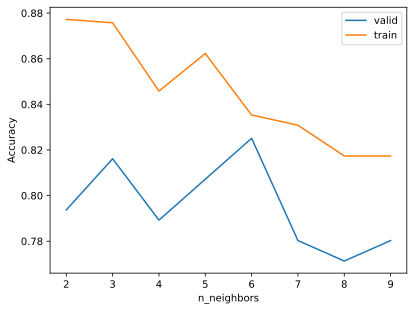

In [24]:
plt.plot(k_vals, accuracy_valid)
plt.plot(k_vals, accuracy_train)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend(['valid', 'train'])
plt.show()

In [25]:
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)

In [26]:
accuracy_score(y_valid, y_pred)

0.8251121076233184

**Точность и полнота**

In [27]:
y_valid.value_counts(normalize=True)

Survived
0    0.600897
1    0.399103
Name: proportion, dtype: float64

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(y_valid, y_pred)

array([[123,  11],
       [ 28,  61]])

True Negative

In [32]:
TN = ((y_valid == 0) & (y_pred == 0)).sum()
TN

np.int64(123)

False Positive

In [34]:
FP = ((y_valid == 0) & (y_pred == 1)).sum()
FP

np.int64(11)

False Negative

In [35]:
FN = ((y_valid == 1) & (y_pred == 0)).sum()
FN

np.int64(28)

True Positive

In [36]:
TP = ((y_valid == 1) & (y_pred == 1)).sum()
TP

np.int64(61)

In [37]:
# Normalized confusion matrix
cm = confusion_matrix(y_valid, y_pred) / y_valid.shape[0]
cm

array([[0.55156951, 0.04932735],
       [0.12556054, 0.2735426 ]])

Точность

In [38]:
Precision = TP / (TP + FP)
Precision

np.float64(0.8472222222222222)

In [40]:
from sklearn.metrics import precision_score

In [41]:
precision_score(y_valid, y_pred)

0.8472222222222222

Полнота

In [42]:
Recall = TP / (TP + FN)
Recall

np.float64(0.6853932584269663)

In [43]:
from sklearn.metrics import recall_score

In [44]:
recall_score(y_valid, y_pred)

0.6853932584269663

**F1 score**

In [45]:
F1 = 2 * (Precision * Recall) / (Precision + Recall)
F1

np.float64(0.7577639751552795)

In [46]:
from sklearn.metrics import f1_score

In [47]:
f1_score(y_valid, y_pred)

0.7577639751552795

**Метрика AUC**

In [48]:
y_pred_proba = clf.predict_proba(X_valid)

In [49]:
y_pred_proba

array([[0.66666667, 0.33333333],
       [0.83333333, 0.16666667],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [0.16666667, 0.83333333],
       [0.83333333, 0.16666667],
       [0.5       , 0.5       ],
       [0.16666667, 0.83333333],
       [0.66666667, 0.33333333],
       [0.83333333, 0.16666667],
       [0.83333333, 0.16666667],
       [1.        , 0.        ],
       [0.83333333, 0.16666667],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.16666667, 0.83333333],
       [1.        , 0.        ],
       [0.83333333, 0.16666667],
       [0.83333333, 0.16666667],
       [0.5       , 0.5       ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.83333333, 0.16666667],
       [0.66666667, 0.33333333],
       [0.83333333, 0.16666667],
       [0.66666667, 0.33333333],
       [0.5       , 0.5       ],
       [0.

In [50]:
y_pred_proba = y_pred_proba[:, 1]

In [89]:
y_pred_proba

array([0.33333333, 0.16666667, 0.        , 1.        , 0.5       ,
       1.        , 0.83333333, 0.16666667, 0.5       , 0.83333333,
       0.33333333, 0.16666667, 0.16666667, 0.        , 0.16666667,
       1.        , 0.33333333, 0.83333333, 0.        , 0.16666667,
       0.16666667, 0.5       , 0.33333333, 0.        , 0.        ,
       0.16666667, 0.33333333, 0.16666667, 0.33333333, 0.5       ,
       0.16666667, 0.66666667, 0.33333333, 0.5       , 0.16666667,
       0.33333333, 0.5       , 0.83333333, 0.5       , 0.        ,
       0.16666667, 0.16666667, 0.        , 0.16666667, 0.5       ,
       0.16666667, 0.16666667, 0.        , 0.16666667, 0.5       ,
       0.33333333, 0.5       , 0.        , 0.66666667, 0.        ,
       0.83333333, 0.33333333, 0.83333333, 1.        , 0.66666667,
       0.16666667, 1.        , 0.66666667, 0.5       , 0.16666667,
       0.66666667, 0.33333333, 0.        , 0.33333333, 1.        ,
       0.83333333, 0.83333333, 0.33333333, 1.        , 0.     

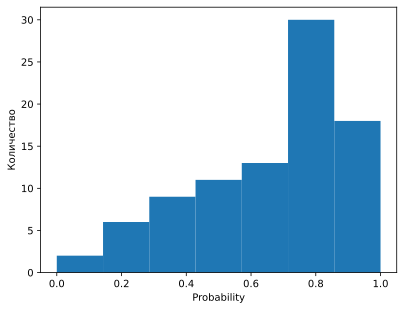

In [56]:
plt.hist(y_pred_proba[y_valid == 1], bins=7)
plt.xlabel('Probability')
plt.ylabel('Количество')
plt.show()

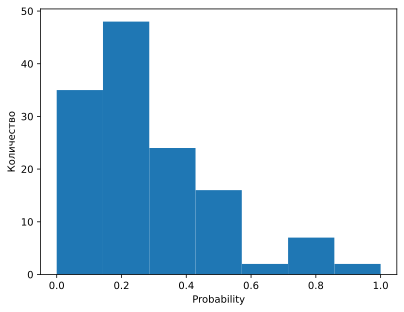

In [54]:
plt.hist(y_pred_proba[y_valid == 0], bins=7)
plt.xlabel('Probability')
plt.ylabel('Количество')
plt.show()

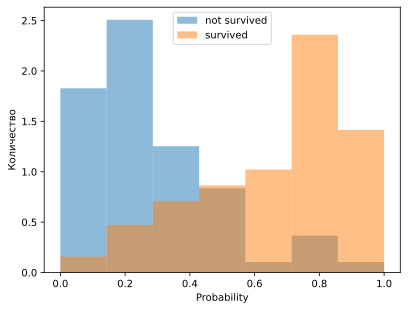

In [63]:
plt.hist(y_pred_proba[y_valid == 0], bins=7, density=True, alpha=0.5)
plt.hist(y_pred_proba[y_valid == 1], bins=7, density=True, alpha=0.5)
plt.legend(['not survived', 'survived'])
plt.xlabel('Probability')
plt.ylabel('Количество')
plt.show()

In [64]:
from sklearn.metrics import roc_curve

In [65]:
fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba, pos_label=1)

False Positive Rate (fall-out)

FPR = FP / N = FP / (FP + TN)

True Positive Rate (recall, sensitivity, hit rate)

TPR = TP / P = TP / (TP + FN)

In [66]:
fpr

array([0.        , 0.01492537, 0.06716418, 0.08208955, 0.20149254,
       0.38059701, 0.73880597, 1.        ])

In [67]:
tpr

array([0.        , 0.20224719, 0.53932584, 0.68539326, 0.80898876,
       0.91011236, 0.97752809, 1.        ])

In [68]:
thresholds

array([       inf, 1.        , 0.83333333, 0.66666667, 0.5       ,
       0.33333333, 0.16666667, 0.        ])

In [69]:
#FPR для порога, равного 1
((y_valid == 0) & (y_pred == 1) & (y_pred_proba >= 1)).sum() / (y_valid == 0).sum()

np.float64(0.014925373134328358)

In [70]:
#TPR для порога, равного 1
((y_valid == 1) & (y_pred == 1) & (y_pred_proba >= 1)).sum() / (y_valid == 1).sum()

np.float64(0.20224719101123595)

In [71]:
#FPR для порога, равного 0.83333333
((y_valid == 0) & (y_pred == 1) & (y_pred_proba >= 0.83333333)).sum() / (y_valid == 0).sum()

np.float64(0.06716417910447761)

In [72]:
#TPR для порога, равного 0.83333333
((y_valid == 1) & (y_pred == 1) & (y_pred_proba >= 0.83333333)).sum() / (y_valid == 1).sum()

np.float64(0.5393258426966292)

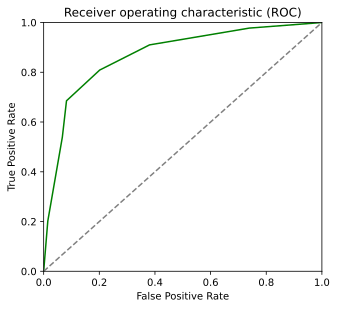

In [86]:
rcParams['figure.figsize'] = 5, 4.5
plt.plot(fpr, tpr, color='green', label='ROC curve')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.show()

In [87]:
from sklearn.metrics import roc_auc_score

In [88]:
roc_auc_score(y_valid, y_pred_proba)

np.float64(0.8695287606909274)